<a href="https://colab.research.google.com/github/saurabbh14/Python_Tut/blob/main/Practical_Course_ASM_Tutorial_4_Follow_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diving deep into scientific computing


## Recap & homework discussion

Let's go over the things you learnt so far.

Here is a (not anymore so) short list of all the concepts you got to know already:

- Hello World
- Calling functions (`print()`, `math.exp()`)
- Basic data types in Python (`bool`, `float`, `int`, `str`)
- Math operations in Python (`+, -, *, /, //, %`)
- Defining functions (`morse()`)
- Loops (`for` and `while`)
- Lists (`[1, 2, 3, 4]`)
  - list indexing (`item_at_index = l[index]`)
  - list slicing (`sublist_until_index = l[:index]`)
  - list comprehension (`[func(x) for x in list_of_x]`)
- A basic representation of vectors in Python (as a `list`)
- A basic representation of matrices in Python (as a list of lists: `[[1,1], [1,2]]`)
- If-else statements (asking questions, making decisions)
- Reading/writing files


Did you encounter any problems, syntax errors or other issues in your home-based Python journey? 



In [ ]:
# Did you encounter any problems/bugs/errors?

## Science with Python & the `NumPy` library

Now we have all the basics at hand to get going scientifically. The most prominent package in the scientific ecosystem in Python is called `numpy`. Numpy comes with its own, extremely powerful vector/array/list container type called `numpy.ndarray` (n-dimensional array). An array in computer programming is typically a data structure that has a set size and is homogeneous regarding its contents. This might seem like a disadvantage, however, it has some very specific advantages. 

These arrays are implemented to allow for *vectorised operations*, that means that one single operation (in code) is applied to all elements of the array at once. See the following example: 

First element:  [1339.56454329 1320.01714662 1300.69849659 1281.60633313 1262.73841715
 1244.09253032 1225.66647485 1207.4580734  1189.4651688  1171.68562391]
Last element:  [555.12306892]
First element (list):  1339.5645432926017
Last element (list):  555.1230689151517
True


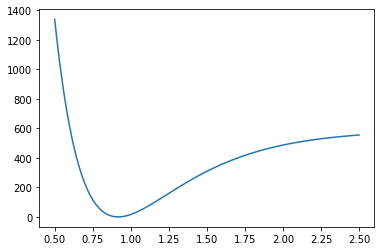

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Our trusty old Morse potential function.
# We only modify it by using the numpy version of `exp()`
def morse(r):
  beta = 2.203
  d = 590.7
  r_eq = 0.917

  e = d * (1 - np.exp(-beta * (r-r_eq))) ** 2

  return e


# Generate a 1000-component index in a set interval of [0.5, 2.5]
r_array = np.linspace(0.5, 2.5, num=1000) 
morse_array = morse(r_array)


# You can index and slice them just like lists:
print("First element: ", morse_array[0:10])
print("Last element: ", morse_array[-1:])


# Like lists, ndarrays can be used in plotting
plt.plot(r_array, morse_array)


# You can even convert ndarrays to lists and vice versa
m_list = list(morse_array)
print("First element (list): ", m_list[0])
print("Last element (list): ", m_list[-1])


# The np.asarray function converts lists to ndarrays
new_m_array = np.asarray(m_list)


print(np.all(new_m_array == morse_array)) # See whether all the elements are the same

The numpy library is extremely mature in that the array container supports a ton of operations and the numpy library includes a variety of specialised functions to work on arrays and matrices.

Take for example the matrix multiplication. With Numpy, you will just write:

In [ ]:
np.arange(18)

In [42]:
# Build two matrices. The .reshape() method, well, reshapes the array.
matrix1 = np.arange(18).reshape([3,6])
matrix2 = np.arange(12).reshape([6,2])
print(matrix1)
print(matrix2)

# You can use the `@` operator ...
res = matrix1 @ matrix2
print(res)

# ... or use the function `np.matmul()`
res = np.matmul(matrix1, matrix2)
print(res)

print(None)  # a special Data type of null value in python

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[[110 125]
 [290 341]
 [470 557]]
[[110 125]
 [290 341]
 [470 557]]
None


So another neat thing in NumPy is input/output. Up to now you have been writing often lengthy functions to read or write data files. While this may be necessary for more specialised data formats, NumPy allows for easy reading and writing of standard n-column `.txt` files.

In [20]:
# This is a short Linux command to generate a matrix file 
# Notice the '#' mark, this indicates a comment in numpy-readable data
! printf '# 3:3\n1, 2, 3\n2, 3, 7\n11, 8, 250\n' > /content/np_matrix.txt

# You can view the content of the file using the following command:
! cat /content/np_matrix.txt

# 3:3
1, 2, 3
2, 3, 7
11, 8, 250


In [35]:
# Now we can read the file with numpy:
import numpy as np

read_matrix = np.loadtxt("/content/np_matrix.txt", delimiter=",", dtype=np.int0)
print(read_matrix)

# And similarly, write the file:
np.savetxt("/content/np_matrix_out.txt", read_matrix, delimiter=",", fmt="%.0d")

# Easy, isn't it? This of course also works for larger data files including 
# spectra and other xy-data files. 
! cat /content/np_matrix_out.txt

[[  1   2   3]
 [  2   3   7]
 [ 11   8 250]]
1,2,3
2,3,7
11,8,250


And this is just the very tip of the iceberg. From now on, we will mainly live in the Numpy ecosystem to build our scientific calculations.

## Towards molecular dynamics

After having started on our journey into the scientific world using `numpy`, we will now get a bit more practical! As a first start, let's implement a small program to calculate the time evolution of an ideal pendulum using Newtonian dynamics.




### Functions (general motion with constant acceleration)

Isaac Newton and others found a set of differential equations that govern the motion of physical objects under the influence of an external force (such as gravity). 
The classical differential equations of motion are:

$$
\mathbf{v} = \dfrac{\mathrm{d}\mathbf{r}}{\mathrm{d}t}, \quad \mathbf{a} = \dfrac{\mathrm{d}\mathbf{v}}{\mathrm{d}t}  = \dfrac{\mathrm{d}^2 \mathbf{r}}{\mathrm{d}t^2}
$$

The general solutions to these differential equations in the case of a constant acceleration are given by:

\begin{align}
\mathbf{v} &= \mathbf{a}t + \mathbf{v}_0 \\
\mathbf{r} &= \mathbf{r}_0 + \mathbf{v}_0 t + \frac{1}{2}\mathbf{a}t^2\\
\mathbf{r} &= \mathbf{r}_0 + \frac{1}{2}(\mathbf{v} + \mathbf{v}_0)t \\
\end{align}



### Newton's equation of motion

Now, Newton found the connection between a force $F$ and the acceleration of an object. 

\begin{align}
F &= \dfrac{\mathrm{d}\mathbf{p}}{\mathrm{d}t} = \dfrac{\mathrm{d}(m\mathbf{v})}{\mathrm{d}t} \\
\mathrm{for~constant~masses}\quad\to\quad&= m \dfrac{\mathrm{d}\mathbf{v}}{\mathrm{d}t} \\
&= m \mathbf{a} \\
\Leftrightarrow \mathbf{a} &= \dfrac{F}{m}
\end{align}

These relations will come in very handy in our cases, as the force $F$ is directly related to the potential energy of the system $E$ by:

$$
F(\mathbf{r}) = -\dfrac{\mathrm{d}E_{pot}(\mathbf{r})}{\mathrm{d}\mathbf{r}}
$$


### Velocity Verlet algorithm

In order to numerically solve the equations of motion for an unknown system, many algorithms have been developed over the last decades. One particularly easy and still comparably accurate approach is the so-called velocity verlet algorithm. In numerical approaches, we usually solve equations iteratively, by computing quantities by small steps at each time. Here, we only take very small steps in time $\Delta t$ at each computation. 

The two fundamental equations are the following: 

\begin{align}
\mathbf{x}(t+\Delta t) &= \mathbf{x}(t) + \mathbf{v}(t)\Delta t + \frac{1}{2}\mathbf{a}(t) \Delta t^2 \\
\\
\mathbf{v}(t+\Delta t) &= \mathbf{v}(t) + \dfrac{\mathbf{a}(t) + \mathbf{a}(t + \Delta t)}{2}\Delta t \\
%
\end{align}

These equations may look complex, but actually, the algorithm is really straight-forward:


#### Algorithmic steps

1. Start from initial system state

2. Calculate new position:
$$
\mathbf{x}(t+\Delta t) = \mathbf{x}(t) + \mathbf{v}(t)\Delta t + \frac{1}{2}\mathbf{a}(t) \Delta t^2
$$

3. Calculate intermediate velocity
$$
\mathbf{v}(t+\dfrac{1}{2}\Delta t) = \mathbf{v}(t) + \dfrac{1}{2}\mathbf{a}(t)\Delta t
$$

4. Compute new acceleration $\mathbf{a}(t+\Delta t)$ using the new position $\mathbf{x}(t+\Delta t)$ (Oscillator energy at $\mathbf{x}(t+\Delta t)$ )

5. Calculate new velocity 
$$
\mathbf{v}(t+\Delta t) = \mathbf{v}(t+\dfrac{1}{2}\Delta t) + \dfrac{1}{2}\mathbf{a}(t+\Delta t) \Delta t
$$

6. Go back to step 2 and repeat the process.

Now let's get all this into code form by implementing the velocity Verlet algorithm in a single dimension. Therefore, $\mathbf{r} \to r $. We start with a classical pendulum with the potential energy $E_{pot}(r) = \frac{1}{2}\omega x^2$. So what's the force exerted here?

In [ ]:
#Visualize the potential energy as we did in Morse Potential
import matplotlib.pyplot as plt

def E_pot(r, omega):
  return 

# r range from -10 to 10
r_array=np.linspace(-10, 10, num=10000)

# plot the Potential Energy curve



**Task**: Build the velocity Verlet algorithm based on the template code you find below:

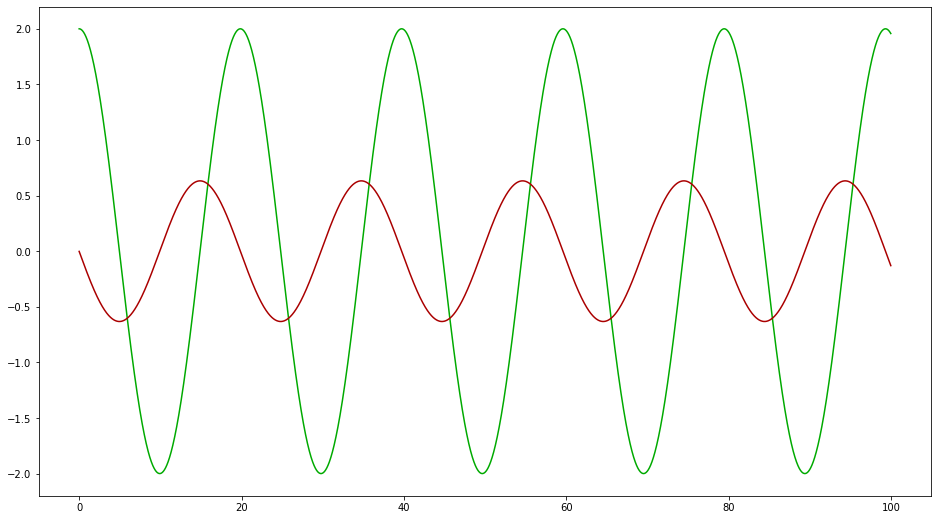

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Model system (a = F/m) 
def a(r, r_0=0.0, m=2.0, omega=0.2):
  acc = -(omega * (r-r_0)) / m
  return acc

# Define the time parameters & a time grid for plotting
dt = 0.01
n_dt = 10000
t = np.arange(n_dt) * dt

# Define the start values of position r & v as well as
r = 2.0
r_store = np.zeros(n_dt)

v = 0.0
v_store = np.zeros(n_dt)


# Main integration loop
for i in range(n_dt):
  r_fdt = r + v * dt + 0.5 * a(r) * dt**2  # Step 2
  v_hdt = v + 0.5 * a(r) * dt              # Step 3
  v_fdt = v_hdt + 0.5 * a(r_fdt) * dt      # Step 4: a(r_fdt) & Step 5 

  # Update variables
  r = r_fdt
  v = v_fdt

  # Store r & v in the storage arrays
  r_store[i] = r
  v_store[i] = v


# Set up plotting (a bit fancier than you might remember)
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

# Plotting the storage arrays against the time grid.
ax.plot(t, r_store, color="#00aa00")
ax.plot(t, v_store, color="#aa0000")

# Show the plot
plt.show()

Aaand there you have it! Your first computation of physical meaning! 🎉 Congratulations!